## kutuphaneleri yukleyelim

In [46]:
import Yusuf2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings 
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,0,0,0,T,N,Red,Trapezoid,Snake,India,...,e027decef,1,Contributor,Freezing,k,K,dh,3,8,0
299996,299996,0,0,0,F,Y,Green,Trapezoid,Lion,Russia,...,80f1411c8,2,Novice,Freezing,h,W,MO,3,2,0
299997,299997,0,0,0,F,Y,Blue,Star,Axolotl,Russia,...,314dcc15b,3,Novice,Boiling Hot,o,A,Bn,7,9,1
299998,299998,0,1,0,F,Y,Green,Square,Axolotl,Costa Rica,...,ab0ce192b,1,Master,Boiling Hot,h,W,uJ,3,8,1


In [5]:
test_data = pd.read_csv('test.csv')
test_data

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
1,300001,0,0,0,T,N,Red,Square,Lion,Canada,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
2,300002,1,0,1,F,Y,Blue,Square,Dog,China,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
3,300003,0,0,1,T,Y,Red,Star,Cat,China,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
4,300004,0,1,1,F,N,Red,Trapezoid,Dog,China,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,499995,0,0,0,F,N,Green,Square,Lion,Canada,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
199996,499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
199997,499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1
199998,499998,1,0,0,T,Y,Blue,Star,Hamster,Costa Rica,...,606ac930b,d4cf587dd,2,Grandmaster,Boiling Hot,g,X,Ye,2,1


## train ve test datası buyuk oldugu için ilk 3000 ve 1000 satırları alıp yeni csv dosyası olusturalım

In [6]:
new_train = train_data[:3000]
new_test = test_data[:1000]

In [8]:
new_train

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,1,1,1,F,Y,Green,Star,Lion,Finland,...,35ab040ba,3,Contributor,Freezing,e,T,Nk,1,11,0
2996,2996,0,1,0,F,Y,Blue,Star,Dog,Canada,...,268aa26bc,2,Novice,Freezing,g,Y,ke,2,12,0
2997,2997,0,0,1,F,Y,Blue,Trapezoid,Dog,Costa Rica,...,f65fb6a89,1,Novice,Freezing,l,Q,qA,2,4,0
2998,2998,0,0,0,F,Y,Blue,Trapezoid,Snake,Russia,...,5637aafe1,1,Master,Hot,k,Q,Hj,1,2,0


In [10]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3000 non-null   int64 
 1   bin_0   3000 non-null   int64 
 2   bin_1   3000 non-null   int64 
 3   bin_2   3000 non-null   int64 
 4   bin_3   3000 non-null   object
 5   bin_4   3000 non-null   object
 6   nom_0   3000 non-null   object
 7   nom_1   3000 non-null   object
 8   nom_2   3000 non-null   object
 9   nom_3   3000 non-null   object
 10  nom_4   3000 non-null   object
 11  nom_5   3000 non-null   object
 12  nom_6   3000 non-null   object
 13  nom_7   3000 non-null   object
 14  nom_8   3000 non-null   object
 15  nom_9   3000 non-null   object
 16  ord_0   3000 non-null   int64 
 17  ord_1   3000 non-null   object
 18  ord_2   3000 non-null   object
 19  ord_3   3000 non-null   object
 20  ord_4   3000 non-null   object
 21  ord_5   3000 non-null   object
 22  day     3000 non-null   

In [11]:
new_train.isnull().sum()

id        0
bin_0     0
bin_1     0
bin_2     0
bin_3     0
bin_4     0
nom_0     0
nom_1     0
nom_2     0
nom_3     0
nom_4     0
nom_5     0
nom_6     0
nom_7     0
nom_8     0
nom_9     0
ord_0     0
ord_1     0
ord_2     0
ord_3     0
ord_4     0
ord_5     0
day       0
month     0
target    0
dtype: int64

In [12]:
new_train.describe()

,id,bin_0,bin_1,bin_2,ord_0,day,month,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1499.500000,0.141667,0.255333,0.370333,1.485667,3.027000,5.736667,0.296667
std,866.169729,0.348766,0.436121,0.482974,0.724778,1.832136,3.856805,0.456864
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,749.750000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000
50%,1499.500000,0.000000,0.000000,0.000000,1.000000,3.000000,4.000000,0.000000
75%,2249.250000,0.000000,1.000000,1.000000,2.000000,4.000000,9.000000,1.000000
max,2999.000000,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.000000


In [13]:
new_train.describe(include = object)

,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_1,ord_2,ord_3,ord_4,ord_5
count,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000
unique,2,2,3,6,6,6,4,214,482,964,1433,2567,5,6,15,26,183
top,T,Y,Green,Trapezoid,Lion,Russia,Oboe,2979f0d45,bc82e0ba0,a4592b8a2,de61586f8,ca1f813f4,Novice,Freezing,l,G,od
freq,1527,1908,1245,1016,1055,998,932,37,21,11,9,4,1204,986,372,211,55


## Gorsellestirme

In [14]:
new_train.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

### bin_ sutunları

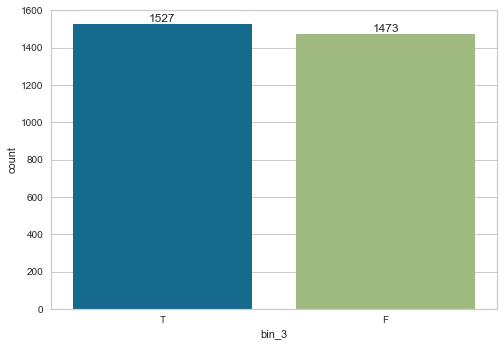

In [15]:
ax = sbn.countplot(x = new_train['bin_3'])
ax.bar_label(ax.containers[0]);

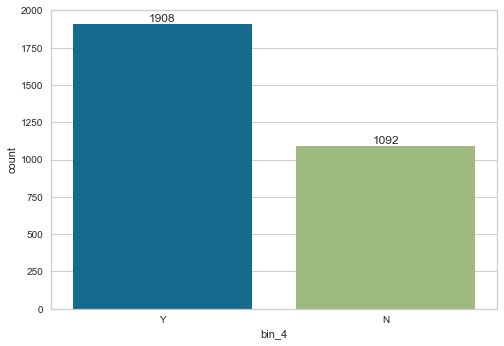

In [16]:
ax = sbn.countplot(x = new_train['bin_4'])
ax.bar_label(ax.containers[0]);

### nom_ sutunları

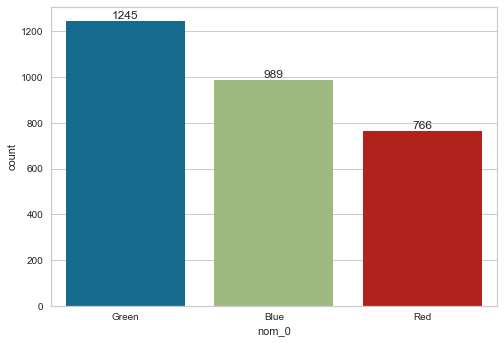

In [17]:
ax = sbn.countplot(x = new_train['nom_0'])
ax.bar_label(ax.containers[0]);

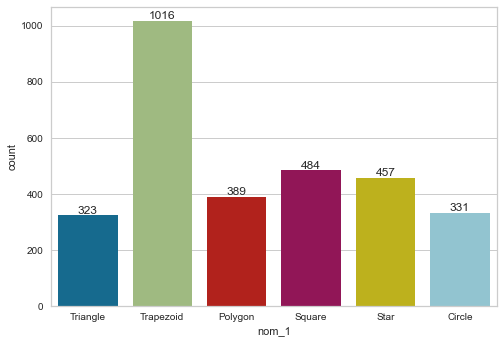

In [18]:
ax = sbn.countplot(x = new_train['nom_1'])
ax.bar_label(ax.containers[0]);

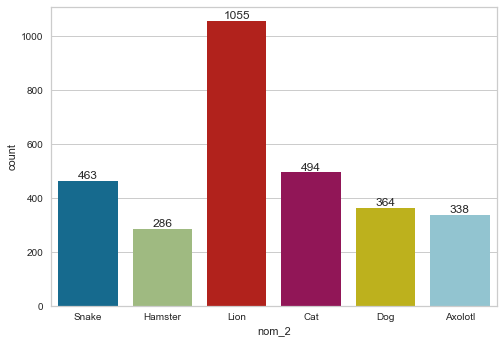

In [19]:
ax = sbn.countplot(x = new_train['nom_2'])
ax.bar_label(ax.containers[0]);

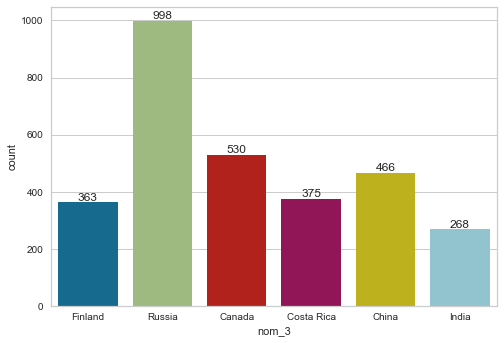

In [20]:
ax = sbn.countplot(x = new_train['nom_3'])
ax.bar_label(ax.containers[0]);

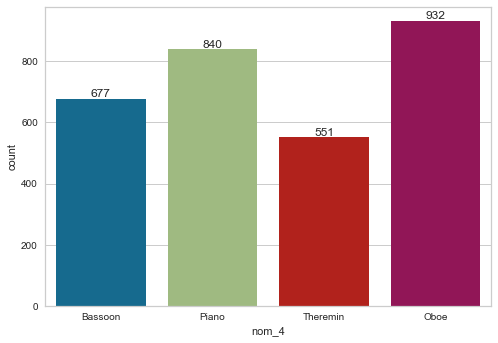

In [21]:
ax = sbn.countplot(x = new_train['nom_4'])
ax.bar_label(ax.containers[0]);

In [28]:
new_train['nom_5'].nunique(), new_train['nom_6'].nunique(), new_train['nom_7'].nunique(),new_train['nom_8'].nunique(), new_train['nom_9'].nunique()

(214, 482, 964, 1433, 2567)

### ord_ sutunları

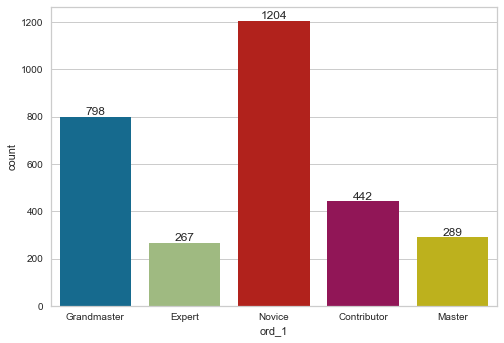

In [30]:
ax = sbn.countplot(x = new_train['ord_1'])
ax.bar_label(ax.containers[0]);

In [ ]:
ax = sbn.countplot(x = new_train['ord_2'])
ax.bar_label(ax.containers[0]);

In [32]:
new_train.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

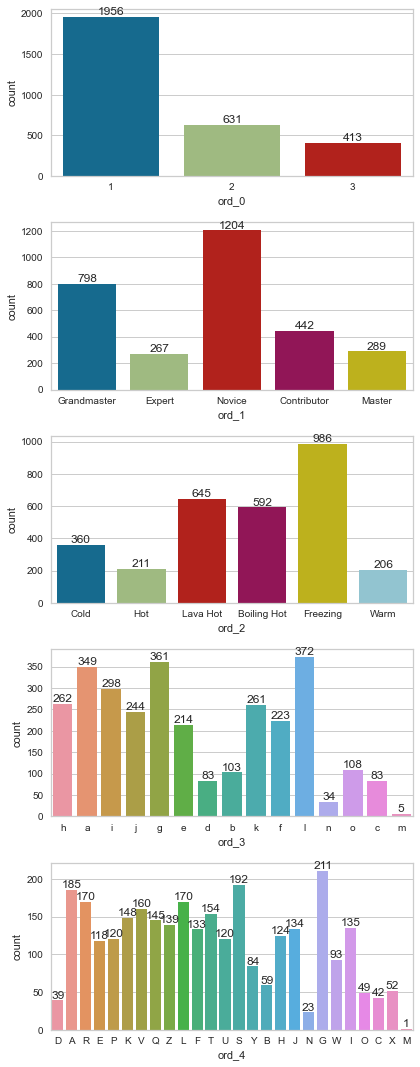

In [36]:
col = ['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4']
fig, axs = plt.subplots(5, 1, figsize=(6, 15))

for i, ax in enumerate(axs):
    sbn.countplot(x=new_train[col[i]], ax=ax)
    ax.bar_label(ax.containers[0])

plt.tight_layout()   # plt.tight_layout(), alt grafikler arasındaki boşlukları düzenler.
plt.show()

In [37]:
new_train['ord_5'].nunique()

183

### veriyi duzenlemek için Yusuf2'den sadece_boslukları_doldur fonksiyonunu çekiyoruz.

In [38]:
Yusuf2.sadece_boslari_doldur(new_train)

In [39]:
new_train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,day,month,target
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,2,Grandmaster,Cold,h,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,1,Grandmaster,Hot,a,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,1,Expert,Lava Hot,h,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,1,Grandmaster,Boiling Hot,i,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,1,Grandmaster,Freezing,a,7,8,0


### şimdi de Yusuf2'den sınıflandırma fonksiyonunu çekelim

            Accuracy
Gradient   73.833333
AdaBoost   72.666667
Logistic   72.500000
Bernoulli  72.166667
Support    71.833333
Random     71.166667
Hist       70.833333
Gaussian   69.500000
Bagging    68.833333
XGBoost    68.000000
Decision   56.500000


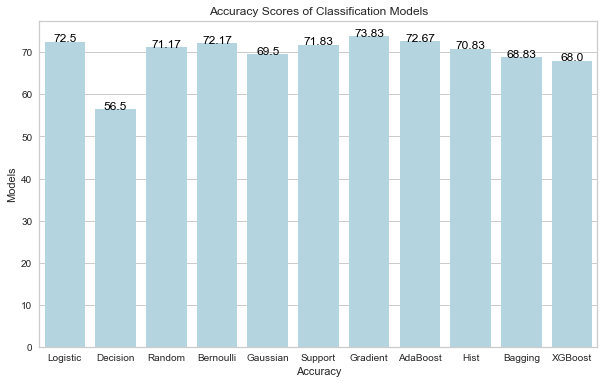

In [40]:
Yusuf2.boslari_doldur_siniflandirma(new_train, 'target')

### şimdi de Derin Öğrenmeyle tahmin edelim

In [45]:
x = new_train.drop('target', axis = 1)
y = new_train['target']
x = pd.get_dummies(x, drop_first = True)

In [47]:
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [93]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)
#x_train = MinMaxScaler().fit_transform(x_train)
#x_test = MinMaxScaler().fit_transform(x_test)

In [108]:
model = Sequential()
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 1, activation = 'relu'))

model.compile(optimizer = 'adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [109]:
erken_durma = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min')

In [110]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_true), 
                    verbose = 1, batch_size = 128, epochs = 100, callbacks = [erken_durma])

Epoch 1/100
19/19 [==============================] - 2s 23ms/step - loss: 0.7787 - accuracy: 0.6787 - val_loss: 0.5856 - val_accuracy: 0.7167
Epoch 2/100
19/19 [==============================] - 0s 25ms/step - loss: 0.5976 - accuracy: 0.7058 - val_loss: 0.5787 - val_accuracy: 0.7167
Epoch 3/100
19/19 [==============================] - 0s 15ms/step - loss: 0.5845 - accuracy: 0.7075 - val_loss: 0.5689 - val_accuracy: 0.7117
Epoch 4/100
19/19 [==============================] - 0s 14ms/step - loss: 0.5679 - accuracy: 0.7117 - val_loss: 0.5716 - val_accuracy: 0.7283
Epoch 5/100
19/19 [==============================] - 0s 14ms/step - loss: 0.5548 - accuracy: 0.7146 - val_loss: 0.5768 - val_accuracy: 0.7117
Epoch 6/100
19/19 [==============================] - 0s 14ms/step - loss: 0.5227 - accuracy: 0.7325 - val_loss: 0.5829 - val_accuracy: 0.7067
Epoch 7/100
19/19 [==============================] - 0s 14ms/step - loss: 0.4761 - accuracy: 0.7638 - val_loss: 0.6439 - val_accuracy: 0.7050
Epoch 

In [111]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 50)                2600      
                                                                 
 dense_82 (Dense)            (None, 512)               26112     
                                                                 
 dense_83 (Dense)            (None, 512)               262656    
                                                                 
 dense_84 (Dense)            (None, 512)               262656    
                                                                 
 dense_85 (Dense)            (None, 512)               262656    
                                                                 
 dense_86 (Dense)            (None, 512)               262656    
                                                                 
 dense_87 (Dense)            (None, 128)              

In [112]:
model.evaluate(x_train, y_train)

75/75 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9908


[0.037024594843387604, 0.9908333420753479]

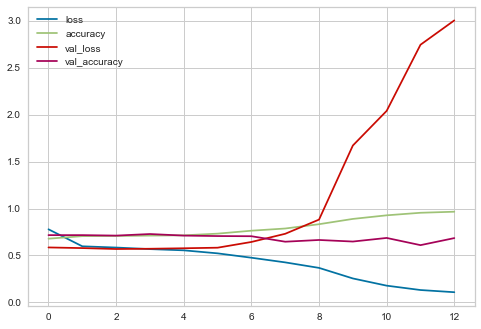

In [113]:
loss = pd.DataFrame(history.history)
loss.plot();

In [114]:
tahmin = model.predict(x_test)
ikili_tahmin = [1 if tahmin >= 0.5 else 0 for tahmin in tahmin]
accuracy_score(ikili_tahmin, y_true) * 100

19/19 [==============================] - 0s 3ms/step


68.5

### test için gradient boost kullanalım.

In [115]:
test_id = new_test['id']
sonuc = pd.DataFrame(columns = ['id', 'target'])

In [116]:
Yusuf2.sadece_boslari_doldur(new_test)

In [118]:
new_test = pd.get_dummies(new_test, drop_first = True)

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
g = GradientBoostingClassifier()
g.fit(x.drop('ord_3_m', axis = 1), y)
pred = g.predict(new_test)

In [120]:
new_test

,bin_0,bin_1,bin_2,ord_0,day,month,bin_3_T,bin_4_Y,nom_0_Green,nom_0_Red,...,ord_3_e,ord_3_f,ord_3_g,ord_3_h,ord_3_i,ord_3_j,ord_3_k,ord_3_l,ord_3_n,ord_3_o
0,0,0,1,2,5,11,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,7,5,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,2,1,12,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,2,3,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,3,4,11,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,3,1,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
996,1,1,0,1,4,11,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
997,1,0,0,2,4,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
998,0,0,0,3,2,9,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
sonuc['id'] = test_id
sonuc['target'] = pred
sonuc

,id,target
0,300000,0
1,300001,1
2,300002,0
3,300003,0
4,300004,1
...,...,...
995,300995,1
996,300996,0
997,300997,0
998,300998,0
